## Import Libraries

In [1]:
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt 
from netCDF4 import Dataset 
from matplotlib.animation import FuncAnimation 

import datetime

## Load Data 

Data includes: 
- Eastward Wind 
- Northward Wind 
- Air pressure at sea level 
- Thickness of surface snow amount 
- Snowfall Rate  

All measured over the same region: 
- North 70° 
- South 37° 
- West  50° 
- East  10°

In [92]:
east_wind = xr.open_dataset('./eastward_wind2.nc') 

north_wind = xr.open_dataset('./northward_wind2.nc') 

pressure_sea_level = xr.open_dataset('./air_pressure_at_sea_level2.nc') 

thickness_snow = xr.open_dataset('./thickness_of_surface_snow_amount2.nc')

snowfall_rate = xr.open_dataset('./snowfall_rate.nc') 

air_temperature = xr.open_dataset('./air_temperature.nc') 

snowfall_amount = xr.open_dataset('./snowfall_amount.nc') 


## Air Pressure at Sea Level

In [3]:
#storm_emma_pressure = pressure_sea_level.loc['2018-02-26':'2018-03-04T22:00:00']  
psl = pressure_sea_level.psl 

storm_emma_pressure = psl.loc['2018-02-26':'2018-03-04T22:00:00']  
storm_emma_pressure.shape

(167, 133, 241)

<IPython.core.display.Javascript object>


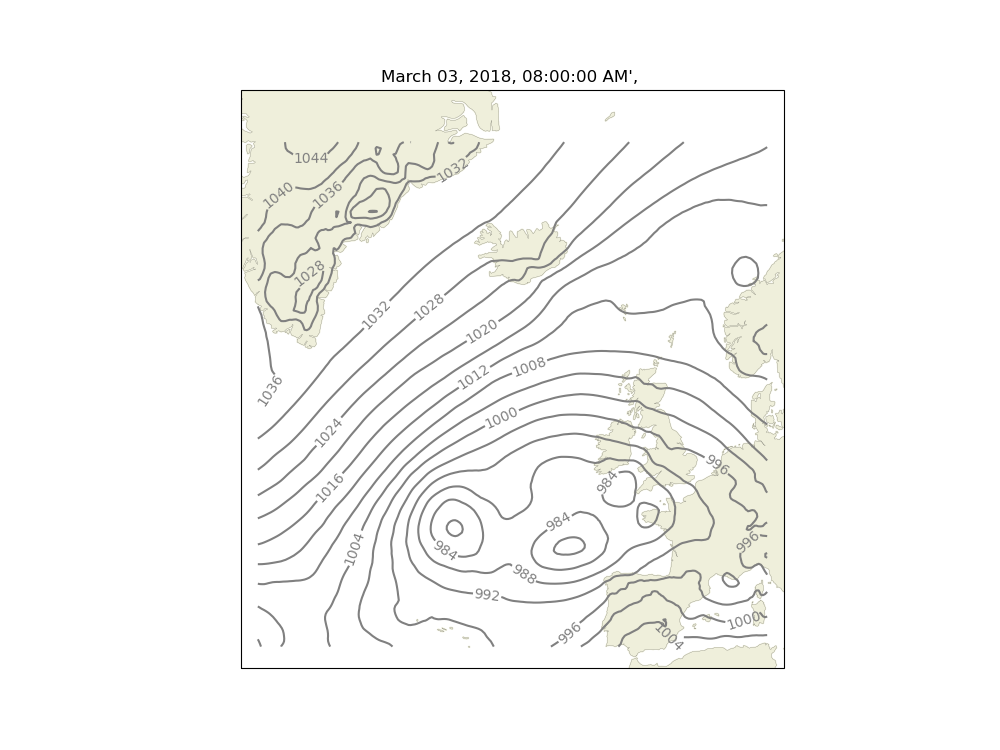

In [64]:
%matplotlib notebook
fig = plt.figure(figsize=[10,7.5])
ax = plt.axes(projection=ccrs.Mercator()) 
lons , lats = np.meshgrid(storm_emma_pressure.lon,storm_emma_pressure.lat)

myc = ax.contour(lons, lats, storm_emma_pressure[0,:,:]/100, np.arange(900,1100,4), colors='grey',
                transform=ccrs.PlateCarree()) 

ax.coastlines(resolution='50m', color='black', linewidth=0.1) 

ax.add_feature(cfeature.LAND)

ax.set_extent([-50, 10, 37, 70], crs=ccrs.PlateCarree())



plt.clabel(myc,inline=1,fontsize=10,fmt='%1.0f',inline_spacing=1)

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels = False

def init_func():
    ax.clear()

def animate(i): 
    ax.clear() 
    ax.coastlines(resolution='50m', color='black', linewidth=0.1) 
    plt.title(str(storm_emma_pressure["time"].dt.strftime("%B %d, %Y, %r")[i])[40:70])
    ax.add_feature(cfeature.LAND)

    ax.set_extent([-52, 12, 35, 72], crs=ccrs.PlateCarree())
    z = storm_emma_pressure[i,:,:]
    myc = ax.contour(lons, lats, z/100, np.arange(900,1100,4), colors='grey',
                transform=ccrs.PlateCarree()) 
    plt.clabel(myc,inline=1,fontsize=10,fmt='%1.0f',inline_spacing=1)
    return myc 

anim = FuncAnimation(fig, animate, frames= range(len(storm_emma_pressure)),init_func = init_func)


## Thickness of Snow 

In [67]:
thickness_snow_storm_emma = thickness_snow.snd_lwe 
thickness_snow_storm_emma = thickness_snow_storm_emma.loc['2018-02-26':'2018-03-04T22:00:00']   

<xarray.DataArray 'snd_lwe' (lat: 133, lon: 241)>
array([[   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [ 344.32498,  672.15936, 1000.     , ...,    0.     ,    0.     ,
           0.     ],
       [ 346.52203,  675.6338 , 1000.     , ...,    0.     ,    0.     ,
           0.     ],
       [ 343.89886,  671.51746, 1000.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)
Coordinates:
    realization              int64 ...
    time                     datetime64[ns] 2018-02-28T02:00:00
  * lat                      (lat) float64 37.0 37.25 37.5 ... 69.5 69.75 70.0
  * lon                      (lon) float64 -50.0 -49.75 -49.5 ... 9.5 9.75 10.0
    experimentVersionNumber  object ...

## Snowfall Rate Over Time

In [69]:
sfrate = snowfall_rate.sfrate

storm_emma_sfrate = sfrate.loc['2018-02-26':'2018-03-04T22:00:00']  
storm_emma_sfrate

<xarray.DataArray 'sfrate' (time: 167, lat: 41, lon: 161)>
[1102367 values with dtype=float32]
Coordinates:
    realization              int64 ...
  * time                     (time) datetime64[ns] 2018-02-26 ... 2018-03-04T...
  * lat                      (lat) float64 47.0 47.25 47.5 ... 56.5 56.75 57.0
  * lon                      (lon) float64 -40.0 -39.75 -39.5 ... -0.5 -0.25 0.0
    experimentVersionNumber  (time) object ...
Attributes:
    long_name:      Snowfall
    units:          m s-1
    standard_name:  lwe_snowfall_rate
    comment:        Snowfall rate (convective + stratiform)
    type:           real

<IPython.core.display.Javascript object>


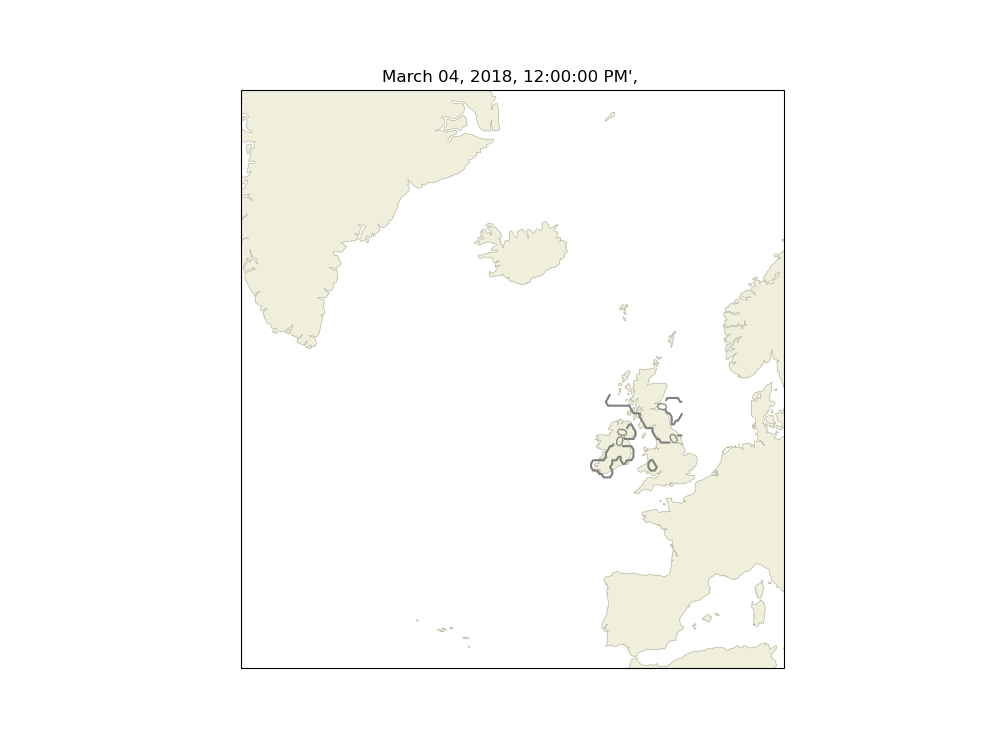

In [71]:
%matplotlib notebook
lons, lats = np.meshgrid(storm_emma_sfrate.lon,storm_emma_sfrate.lat)

fig = plt.figure(figsize=[10,7.5])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black', linewidth=0.1)
ax.add_feature(cfeature.LAND)

ax.set_extent([-50, 30, 29, 71], crs=ccrs.PlateCarree())



# animation function
def animate(i):  
    ax.clear() 
    
    ax.coastlines(resolution='50m', color='black', linewidth=0.1) 

    ax.add_feature(cfeature.LAND)

    ax.set_extent([-52, 12, 35, 72], crs=ccrs.PlateCarree())
    
    myc = ax.contour(lons, lats, storm_emma_sfrate[i,:,:], np.arange(900,1100,4), colors='grey',
                transform=ccrs.PlateCarree()) 
    plt.clabel(myc,inline=1,fontsize=10,fmt='%1.0f',inline_spacing=1)
    
    plt.title(str(storm_emma_sfrate["time"].dt.strftime("%B %d, %Y, %r")[i])[40:70])
    
    return myc  

anim = FuncAnimation(fig, animate, frames= range(len(storm_emma_sfrate)),init_func = init_func)



## Snowfall Amount 


In [89]:
sf = snowfall_amount.sf 
sf_storm_emma = sf.loc['2018-02-26':'2018-03-05'] 
sf_storm_emma[100]

<xarray.DataArray 'sf' (lat: 133, lon: 241)>
array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [2.384186e-07, 2.384186e-07, 2.384186e-07, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.576279e-07, 5.960464e-07, 5.960464e-07, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.576279e-07, 9.536743e-07, 1.668930e-06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)
Coordinates:
    realization              int64 0
    time                     datetime64[ns] 2018-03-02T04:00:00
  * lat                      (lat) float64 37.0 37.25 37.5 ... 69.5 69.75 70.0
  * lon                      (lon) float64 -50.0 -49.75 -49.5 ... 9.5 9.75 10.0
    experimentVersionNumber  object '0001'
Attributes:
    long_name:      Snowfall
    units:          m
    standard_name:  lwe_thickness_of_snowfall_amount
    comment:        The construction lwe_thickness_of_X_amount or _content me...
    type:           real

<IPython.core.display.Javascript object>


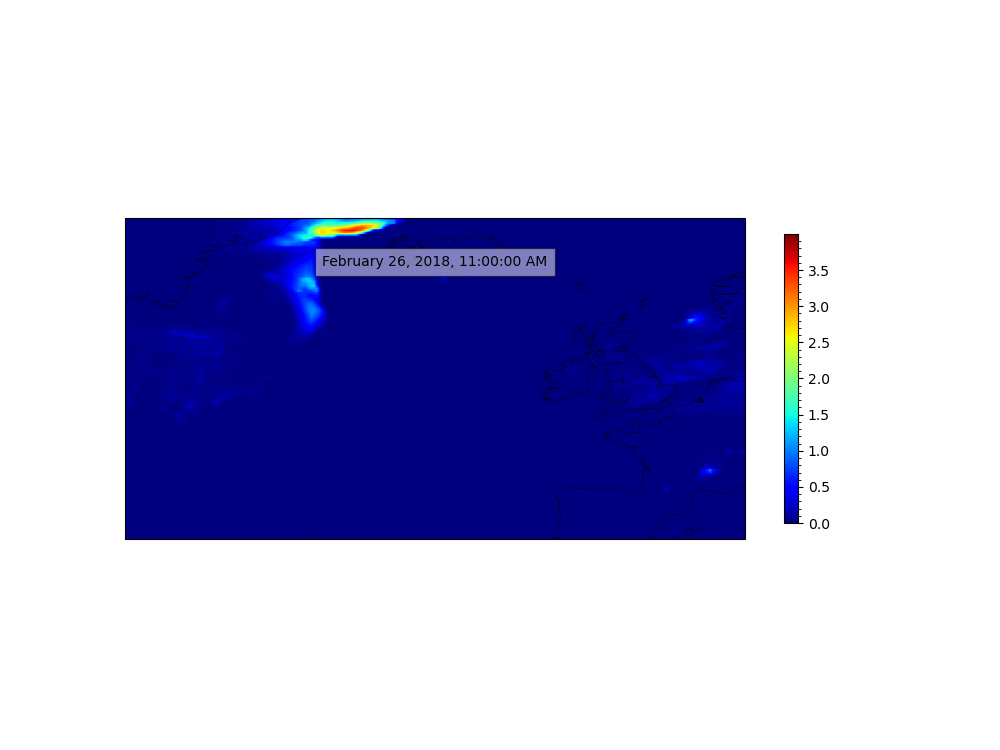

In [91]:
%matplotlib notebook
lons, lats = np.meshgrid(sf_storm_emma.lon,sf_storm_emma.lat)

fig = plt.figure(figsize=[10,7.5])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=0.3)
ax.add_feature(cfeature.LAND)

#ax.set_extent([-50, 30, 29, 71], crs=ccrs.PlateCarree())


im = ax.imshow(sf_storm_emma[0,:,:]*1000,extent = (-48, 8, 39, 68), cmap = 'jet', origin = 'lower') 
fig.colorbar(im, shrink = 0.5).minorticks_on() 
title = ax.text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")


def animate(frame):  
    im.get_array() 
    title.set_text(str(sf_storm_emma["time"].dt.strftime("%B %d, %Y, %r")[frame])[40:70]) 
    im.set_array(sf_storm_emma[frame,:,:]*1000)  
    return [im]

    
    

#     return myc  

anim = FuncAnimation(fig, animate, frames= range(len(temp_storm_emma)),blit = True)

## Air Temperature

In [58]:
temp = air_temperature.tas
temp_storm_emma =  temp.loc['2018-02-26':'2018-03-04T22:00:00'] 
print(str(temp_storm_emma["time"].dt.strftime("%B %d, %Y, %r")[100])[40:70])

March 02, 2018, 04:00:00 AM', 


<IPython.core.display.Javascript object>


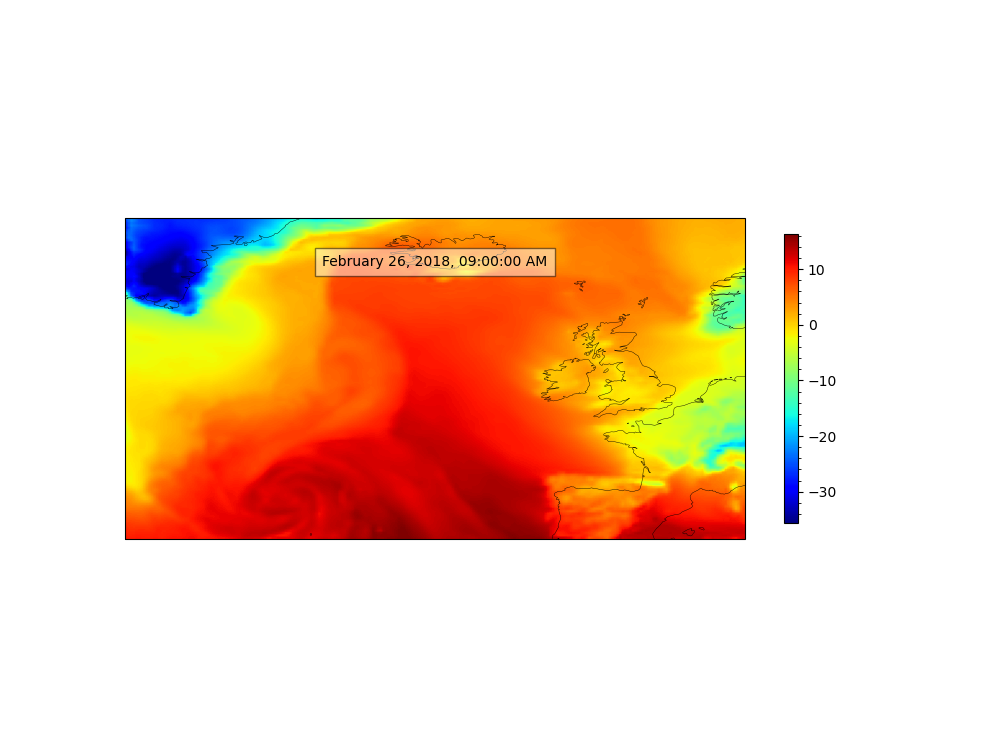

In [65]:
%matplotlib notebook
lons, lats = np.meshgrid(temp_storm_emma.lon,temp_storm_emma.lat)

fig = plt.figure(figsize=[10,7.5])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=0.3)
ax.add_feature(cfeature.LAND)

#ax.set_extent([-50, 30, 29, 71], crs=ccrs.PlateCarree())


im = ax.imshow(temp_storm_emma[0,:,:]-273.15,extent = (-48, 8, 39, 68), cmap = 'jet', origin = 'lower') 
fig.colorbar(im, shrink = 0.5).minorticks_on() 
title = ax.text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")


def animate(frame):  
    im.get_array() 
    title.set_text(str(temp_storm_emma["time"].dt.strftime("%B %d, %Y, %r")[frame])[40:70]) 
    im.set_array(temp_storm_emma[frame,:,:]-273.15)  
    return [im]

    
    

#     return myc  

anim = FuncAnimation(fig, animate, frames= range(len(temp_storm_emma)),blit = True)